In [0]:
!pip install -U -q pyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
#authenticate
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
train_downloaded = drive.CreateFile({'id':'1YSsDpWue_1-49y93ZaGg4g7H09jezWWG'})
train_downloaded.GetContentFile('train.csv')
test_downloaded = drive.CreateFile({'id':'1hNAQn59CJqgRBKixwXTUmet3odA4EFVE'})
test_downloaded.GetContentFile('test.csv')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

np.random.seed(1)

In [0]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [29]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [0]:
y_train = df_train['label']
x_train = df_train.drop(labels = ['label'] , axis=1)
del df_train

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


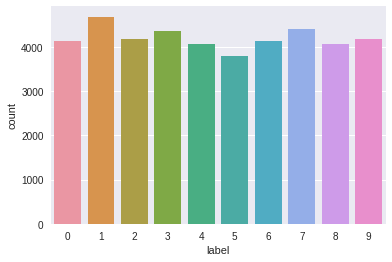

In [31]:
g = sns.countplot(y_train)

In [32]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [0]:
x_train = x_train/255.0
df_test = df_test/255.0

In [34]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [35]:
df_test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
x_train = x_train.values.reshape(-1 , 28 , 28 ,1)
df_test = df_test.values.reshape(-1 , 28 ,28 ,1)

In [0]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train , num_classes = 10)

In [0]:
from sklearn.model_selection import train_test_split
x_train  , x_val , y_train , y_val = train_test_split(x_train , y_train , test_size = .1 , random_state = 0)

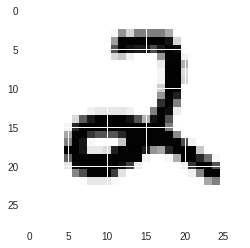

In [39]:
import matplotlib.image as mpimg
g = plt.imshow(x_train[0][: , : , 0])

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
classifier.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))



classifier.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
classifier.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
classifier.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
classifier.add(Dropout(0.25))



classifier.add(Flatten())
classifier.add(Dense(256, activation = "relu"))
classifier.add(Dropout(0.5))
classifier.add(Dense(10, activation = "softmax"))

In [0]:
classifier.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [0]:
epochs = 30 
batch_size = 126

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)


In [49]:
history = classifier.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              )

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 18s - loss: 0.4718 - acc: 0.8427 - val_loss: 0.0659 - val_acc: 0.9795
Epoch 2/30
 - 12s - loss: 0.1407 - acc: 0.9576 - val_loss: 0.0435 - val_acc: 0.9864
Epoch 3/30
 - 12s - loss: 0.1082 - acc: 0.9681 - val_loss: 0.0376 - val_acc: 0.9874
Epoch 4/30
 - 12s - loss: 0.0906 - acc: 0.9729 - val_loss: 0.0340 - val_acc: 0.9893
Epoch 5/30
 - 13s - loss: 0.0777 - acc: 0.9766 - val_loss: 0.0298 - val_acc: 0.9907
Epoch 6/30
 - 13s - loss: 0.0663 - acc: 0.9792 - val_loss: 0.0327 - val_acc: 0.9900
Epoch 7/30
 - 13s - loss: 0.0620 - acc: 0.9817 - val_loss: 0.0269 - val_acc: 0.9917
Epoch 8/30
 - 13s - loss: 0.0604 - acc: 0.9824 - val_loss: 0.0268 - val_acc: 0.9917
Epoch 9/30
 - 13s - loss: 0.0524 - acc: 0.9833 - val_loss: 0.0228 - val_acc: 0.9929
Epoch 10/30
 - 13s - loss: 0.0527 - acc: 0.9851 - val_loss: 0.0228 - val_acc: 0.9926
Epoch 11/30
 - 13s - loss: 0.0494 - acc: 0.9855 - val_loss: 0.0226 - val_acc: 0.9917
Epoch 12/30
 - 13s - loss:

In [0]:
results = classifier.predict(df_test)


results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [57]:
results

0        2
1        0
2        9
3        0
4        3
5        7
6        0
7        3
8        0
9        3
10       5
11       7
12       4
13       0
14       4
15       3
16       3
17       1
18       9
19       0
20       9
21       1
22       1
23       5
24       7
25       4
26       2
27       7
28       4
29       7
        ..
27970    5
27971    0
27972    4
27973    8
27974    0
27975    3
27976    6
27977    0
27978    1
27979    9
27980    3
27981    1
27982    1
27983    0
27984    4
27985    5
27986    2
27987    2
27988    9
27989    6
27990    7
27991    6
27992    1
27993    9
27994    7
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64